# Import libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Data ingension

In [2]:
df = pd.read_csv("/Users/bot/Desktop/AI_Tr_BOT/AI_training_BOT/ML_assignment1_kaustubh/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

# Data Inspection

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

In [12]:
df.shape

(7043, 21)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking the value counts of each column to access the unique values
for i in df.columns:
    print(df[i].value_counts()) 
    print("\n")

customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    1
             ..
6840-RESVB    1
2234-XADUH    1
4801-JZAZL    1
8361-LTMKD    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

In [ ]:
# list containig all the column names at a single place
col=[]
for i in df.columns:
    col.append(i)
print(col)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
#checking for null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
# the results of the above cells shows that we do not have any null values in any of the columns.
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [25]:
df["TotalCharges"].isnull().sum()

np.int64(0)

In [ ]:
# checking duplicate rows
df.duplicated().sum() # -> hence there are no duplicate rows in the dataset.

np.int64(0)

## Observations made from Dataset Inspection:
The dataset contains approximately 7,000 customer records with around 20 features related to customer demographics, services, and billing information. The target variable Churn is categorical, indicating whether a customer has left the service. Several features are categorical in nature, such as gender, Contract, and PaymentMethod, while others are numerical like tenure and MonthlyCharges. The TotalCharges column is stored as an object type, indicating potential data quality issues that need cleaning. No explicit missing values or duplicate rows were found, but further preprocessing is required before modeling.

# Identifying features and target variable

In [28]:
#defining target and feature
y = df["Churn"]
X = df.drop("Churn", axis=1)


In [29]:
print(X.shape)
print(y.shape)

(7043, 20)
(7043,)


### Using iloc

In [30]:
# Features: all rows, all columns except last
X = df.iloc[:, :-1]

# Target: all rows, last column
y = df.iloc[:, -1]

In [31]:
print(X.shape)
print(y.shape)

(7043, 20)
(7043,)


In [32]:
# or
target_index = df.columns.get_loc("Churn")

X = df.iloc[:, :target_index]
y = df.iloc[:, target_index]

In [33]:
print(X.shape)
print(y.shape)

(7043, 20)
(7043,)


### Converting churn to binary

In [ ]:
y = y.map({'Yes': 1, 'No': 0})
y # now churn is binary

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Why is churn prediction a supervised learning problem?
Churn prediction is a supervised learning problem because the dataset contains historical examples where the outcome (whether a customer churned or not) is already known. The model learns a mapping between customer features and the churn label using these labeled examples. During training, the model compares its predictions with the true churn values and adjusts accordingly. This feedback loop is what defines supervised learning. The goal is to generalize this learned relationship to unseen customers.

## Why is it a classification problem?
Churn prediction is a classification problem because the target variable represents discrete categories rather than continuous values. Each customer belongs to one of two classes: churned or retained. The model’s task is to assign new customers to one of these predefined classes. Since the output is categorical and not numerical, regression techniques are not appropriate. This makes churn a binary classification problem.

# Data Preprocessing

### Identify Categorical vs Numerical Columns

In [42]:
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns


/var/folders/nn/t_p60zwn7m5gt8h1pcg4r6b00000gn/T/ipykernel_63905/1388597945.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_columns = X.select_dtypes(include=['object']).columns


In [43]:
print(f"Categorical columns: {categorical_columns}")
print(f"Numeric columns: {numeric_columns}")

Categorical columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='str')
Numeric columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='str')


In [44]:
X["TotalCharges"].dtype

dtype('float64')

In [45]:
# Convert TotalCharges to numeric
X["TotalCharges"] = pd.to_numeric(X["TotalCharges"], errors="coerce")

# Check missing values after conversion
X["TotalCharges"].isnull().sum()


np.int64(0)

### One-Hot Encode Categorical Features

In [49]:
#we will one hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
print(f"Shape of X_encoded: {X_encoded.shape}")

Shape of X_encoded: (7043, 7072)


In [50]:
# Final checks
X_encoded.isnull().sum().sum(), X_encoded.dtypes.unique()


(np.int64(0),
 array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object))

In [51]:
# Update X to final processed version
X = X_encoded

# Final shapes
X.shape, y.shape


((7043, 7072), (7043,))

### Data Preprocessing Summary:
The dataset contained both categorical and numerical features, requiring different preprocessing techniques. Categorical variables such as contract type and payment method were converted into numeric format using one-hot encoding. The TotalCharges column, originally stored as a string, was converted to a numeric format, and missing values caused by blank entries were filled with zero. After preprocessing, all features were numeric and no missing values remained. The final feature matrix is suitable for machine learning model training.

# Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((4930, 7072), (2113, 7072))

### Verifying Class Distribution

In [54]:
print("Train churn distribution:\n", y_train.value_counts(normalize=True))
print("\nTest churn distribution:\n", y_test.value_counts(normalize=True))

Train churn distribution:
 Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Test churn distribution:
 Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


### Why We Use a Train–Test Split Only

For this baseline churn prediction model, a simple train–test split is used to evaluate performance. The training set is used to fit the model, while the test set represents unseen customer data used for final evaluation. Since no hyperparameter tuning or model selection is performed, a separate validation set is not strictly required. Using a fixed random state ensures reproducibility, and stratification preserves the class distribution of churn across splits. This approach is sufficient for establishing a baseline model.

### Why We Still Do NOT Train on Test Data

The test set must remain completely unseen during training to provide an unbiased estimate of model performance. Training on test data would cause data leakage, resulting in misleading evaluation metrics. The purpose of the test set is to simulate real-world future data. Once the model is evaluated on the test set, its results should be considered final.

# Baseline model

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize model with default parameters
model = LogisticRegression(max_iter=1000) # max_iter=1000 ensures convergence


### Train the model

In [56]:
# Train model on training data only
model.fit(X_train, y_train)

/Users/bot/Desktop/AI_Tr_BOT/AI_training_BOT/ML_assignment1_kaustubh/mlenv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
# Predict on test data
y_test_pred = model.predict(X_test)

# predicted probabilities
y_test_proba = model.predict_proba(X_test)[:, 1]


In [58]:
y_test_pred[:10], y_test_proba[:10]


(array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0.60377216, 0.00845879, 0.70138461, 0.00663835, 0.00196452,
        0.01125386, 0.00617876, 0.20301358, 0.08444941, 0.00085969]))

### Decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree with default parameters
dt_model = DecisionTreeClassifier(random_state=42)


In [65]:
# Train Decision Tree
dt_model.fit(X_train, y_train)

# Predict on test data
y_test_pred_dt = dt_model.predict(X_test)


### Model Training Summary

A Logistic Regression model was selected as a baseline classifier for churn prediction. The model was initialized using default parameters and trained exclusively on the training dataset. No information from the test set was used during model fitting to avoid data leakage. After training, predictions were generated for the test set to evaluate the model’s generalization performance. This establishes a baseline against which future improvements can be compared.

### Explicit Data Usage Confirmation

The dataset was split into training and test sets before model development. The Logistic Regression model was trained exclusively using the training data (X_train and y_train). The test data (X_test and y_test) was not used during model training in any form. After training was completed, predictions were generated only on the test set to evaluate model performance on unseen data. This approach ensures a fair and unbiased assessment of the model’s generalization ability.

# Model Evaluation

### Logistic regression model

In [61]:
from sklearn.metrics import accuracy_score

# Accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.792238523426408


### confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm


array([[1369,  183],
       [ 256,  305]])

### CM visualisation

Matplotlib is building the font cache; this may take a moment.


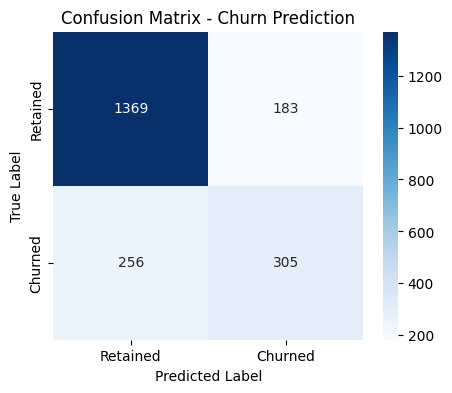

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Retained", "Churned"],
    yticklabels=["Retained", "Churned"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Churn Prediction")
plt.show()


### Decision tree model

In [66]:
from sklearn.metrics import accuracy_score

dt_test_accuracy = accuracy_score(y_test, y_test_pred_dt)
print("Decision Tree Test Accuracy:", dt_test_accuracy)


Decision Tree Test Accuracy: 0.7728348319924279


In [67]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_test_pred_dt)
cm_dt


array([[1352,  200],
       [ 280,  281]])

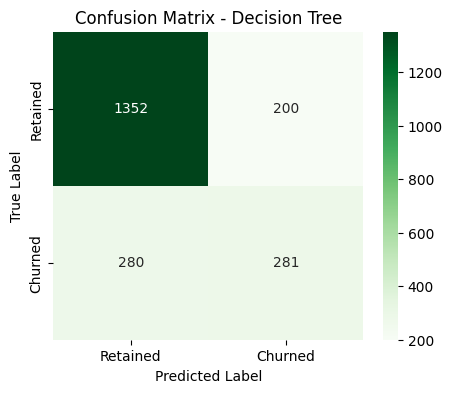

In [68]:
#cm visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Retained", "Churned"],
    yticklabels=["Retained", "Churned"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### Logistic regression v/s Decision tree model comparison

In [69]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Test Accuracy": [test_accuracy, dt_test_accuracy]
})

comparison_df


,Model,Test Accuracy
0,Logistic Regression,0.792239
1,Decision Tree,0.772835


### Final Model Selection

Two baseline models, Logistic Regression and Decision Tree Classifier, were trained and evaluated using the same train–test split. Logistic Regression achieved a higher test accuracy (0.79) compared to the Decision Tree (0.77). Additionally, Logistic Regression is less prone to overfitting and provides more stable performance on unseen data. Given its superior generalization performance and interpretability, Logistic Regression was selected as the final baseline churn prediction model.

# Error Analysis & Limitations

### Where is the model making mistakes?

The Logistic Regression model makes mistakes primarily in cases where customer behavior is ambiguous or borderline between churn and retention. Customers with moderate tenure, average monthly charges, or similar service subscriptions may have patterns that overlap between churned and retained customers. As a result, the model sometimes misclassifies churned customers as retained and vice versa. These errors indicate that linear decision boundaries may not fully capture complex customer behavior patterns.

### Which error is more costly for churn (False Positive vs False Negative)? Why?

False negatives are more costly in churn prediction. A false negative occurs when the model predicts that a customer will stay, but the customer actually churns. In this case, the company misses the opportunity to intervene with retention strategies, resulting in a permanent loss of revenue. False positives, while undesirable, only lead to unnecessary retention efforts, which are typically less costly than losing a customer entirely.

### Why is accuracy alone misleading in this problem?

Accuracy alone is misleading because the churn dataset is imbalanced, with significantly more retained customers than churned ones. A model could achieve high accuracy by simply predicting that all customers will stay, while failing to identify actual churn cases. Accuracy does not differentiate between types of errors or reflect their business impact. Metrics like the confusion matrix provide deeper insight into how the model performs on each class.

### What assumptions does your model make?

Logistic Regression assumes a linear relationship between the input features and the log-odds of the target variable. It also assumes independence between features and that the data does not contain strong multicollinearity. Additionally, the model assumes that important relationships can be captured through linear combinations of features. These assumptions may not always hold true for complex customer behavior data.

### Limitations of the Baseline Model 

Limitations:

The model assumes linear decision boundaries, which may not capture complex non-linear churn patterns.

Feature interactions are not explicitly modeled.

Class imbalance may cause the model to favor the majority (non-churn) class.

No hyperparameter tuning was performed, limiting performance optimization.

The model relies only on historical tabular data and ignores temporal behavior changes.

Business costs of different error types are not incorporated into the loss function.

### Conclusion:
This baseline model provides a solid starting point for churn prediction and highlights areas for future improvement, such as feature engineering, handling class imbalance, and experimenting with more expressive models.